In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image
import category_encoders as ce
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('Data/Part2_data.csv',header=0,index_col=0)

## Numerical Data

In [3]:
numerical_data = data.select_dtypes(include=['int64','float64'])

In [4]:
numerical_data.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
0,5,1,21.0,0,1,12,300,1.0,1994,55526.069421
1,3,4,34.0,0,2,15,400,4.0,1994,59294.455571
2,5,2,47.0,0,3,7,400,3.0,1994,71756.941320
3,2,1,65.0,0,4,4,400,2.0,1994,7584.153493
4,1,3,36.0,0,7,14,400,1.0,1994,98545.374339


**WeekOfMonth** is the week that this data was extracted from the database.**WeekOfMonthClaimed** is the week in which the claim was made. In my opinion **WeekOfMonth** is not an important column and can be removed from the data.
**RepNumber** is the number assigned to the representative who recorded the claim and is not important for fraud analysis so I can remove this feature too.

In [5]:
data = data.drop(columns=["WeekOfMonth","RepNumber"])

Furder data engineering for numerical data will be done after encoding ordinal columns in the next section.

## Categorical Data

In [6]:
categorical_data = data.select_dtypes(include=['object'])
for col in data.columns :
    uniques = data[col].unique()
    print("Column : "+col + ", number of uniques : " + str(len(uniques)))
    print(uniques)
    print("--------------------------------------------------------")

Column : Month, number of uniques : 12
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Mar' 'Aug' 'Apr' 'Jul' 'May' 'Sep' 'Nov']
--------------------------------------------------------
Column : DayOfWeek, number of uniques : 7
['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Thursday']
--------------------------------------------------------
Column : Make, number of uniques : 19
['Honda' 'Toyota' 'Mazda' 'Ford' 'Chevrolet' 'Pontiac' 'Dodge' 'Accura'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------------
Column : AccidentArea, number of uniques : 2
['Urban' 'Rural']
--------------------------------------------------------
Column : DayOfWeekClaimed, number of uniques : 7
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday']
--------------------------------------------------------
Column : MonthClaimed, number of uniques : 12
['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Mar' 'Aug' 'May' 'A

***

#### Ordinal Categories : 

- NumberOfCars
- AddressChange_Claim
- VehiclePrice
- Days_Policy_Claim
- AgeOfVehicle
- AgeOfPolicyHolder
- BasePolicy
- MonthClaimed

note : some categories are ordinal but have a *none* in their values so we have to treat them as nominal

**Encoding Method : Ordinal (Label) Encoding**

***

#### Nominal Categories with up to 3 unique values :

- AccidentArea             
- Sex                      
- Fault                    
- VehicleCategory          
- PoliceReportFiled        
- WitnessPresent           
- AgentType

**Encoding Method : One-Hot Encoding**

***

#### Nominal Categories with more than 3 unique values :

- Make                    
- MaritalStatus            
- PolicyType               
- Days_Policy_Accident     
- PastNumberOfClaims       
- NumberOfSuppliments

**Encoding Method : Binary Encoding Encoding**

***

#### Less important categorical data :

There are some Categorical data that seems to be less important on the fraud : <br>

- Month  : The month of extracing data from database <br>
- DayOfWeek : The day of the week of extracting data from database <br>
- DayOfWeekClaimed : day of week in which the claim was made <br>

Lets have a look on their pie charts:

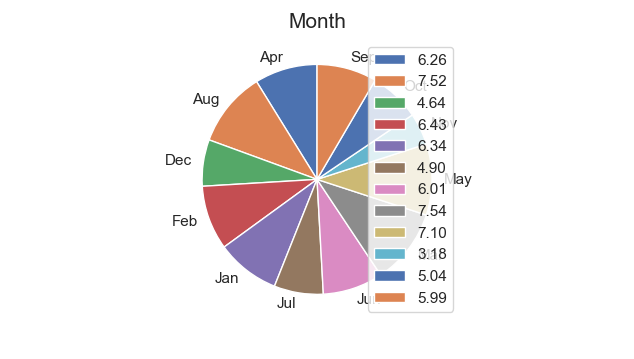

In [7]:
Image("Figures/Part 1/Month.png")

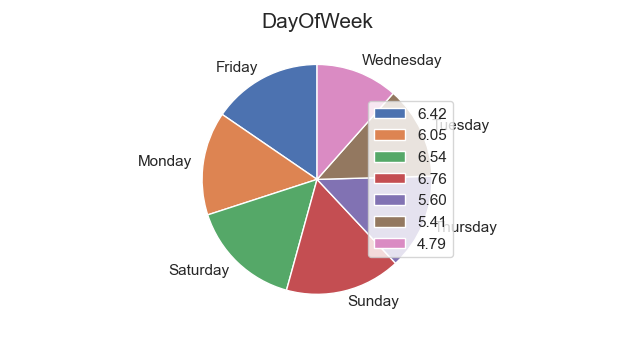

In [8]:
Image("Figures/Part 1/DayOfWeek.png")

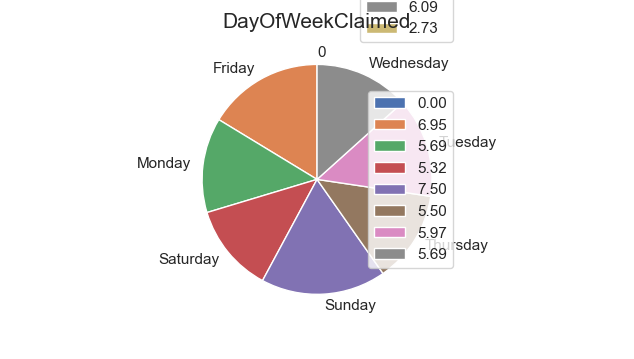

In [9]:
Image("Figures/Part 1/DayOfWeekClaimed.png")

The categorical data that we guessed to be less important, have a faily balanced pie charts (which show the percentage of fraud in their unique values) so we can remove them from the data.

In [10]:
data = data.drop(columns=["DayOfWeekClaimed","Month" ,"DayOfWeek"])
categorical_data = categorical_data.drop(columns=["DayOfWeekClaimed","Month" , "DayOfWeek"])

### Ordinal Data Encoding / Engineering

In [11]:
data["NumberOfCars"] = data["NumberOfCars"].map({'1 vehicle':0,
                                                 '2 vehicles' :1 ,
                                                 '3 to 4' : 2 ,
                                                 '5 to 8' : 3 ,
                                                 'more than 8' : 4}).astype("int64")

data["AddressChange_Claim"] = data["AddressChange_Claim"].map({'no change':0,
                                                               'under 6 months':1,
                                                               '1 year' :2 ,
                                                               '2 to 3 years' : 3 ,
                                                               '4 to 8 years' : 4 }).astype("int64")

data["VehiclePrice"] = data["VehiclePrice"].map({'less than 20000':0,
                                                 '20000 to 29000':1,
                                                 '30000 to 39000' :2 ,
                                                 '40000 to 59000' : 3 ,
                                                 '60000 to 69000' : 4 ,
                                                 'more than 69000' : 5 }).astype("int64")

data["Days_Policy_Claim"] = data["Days_Policy_Claim"].map({'8 to 15':0,
                                                           '15 to 30':1,
                                                           'more than 30' :2 }).astype("int64")

data["AgeOfVehicle"] = data["AgeOfVehicle"].map({'new' : 0,
                                                 '2 years':1,
                                                 '3 years' :2 ,
                                                 '4 years' : 3 ,
                                                 '5 years' : 4 ,
                                                 '6 years' : 5 ,
                                                 '7 years' : 6 ,
                                                 'more than 7' : 7 }).astype("int64")

data["AgeOfPolicyHolder"] = data["AgeOfPolicyHolder"].map({'16 to 17' : 0,
                                                           '18 to 20':1,
                                                           '21 to 25' :2 ,
                                                           '26 to 30' : 3 ,
                                                           '31 to 35' : 4 ,
                                                           '36 to 40' : 5 ,
                                                           '41 to 50' : 6 ,
                                                           '51 to 65' : 7 ,
                                                           'over 65' : 8 }).astype("int64")
data["MonthClaimed"] = data["MonthClaimed"].map({'Jan' : 0,
                                                 'Feb':1,
                                                 'Mar' :2 ,
                                                 'Apr' : 3 ,
                                                 'May' : 4 ,
                                                 'Jun' : 5 ,
                                                 'Jul' : 6 ,
                                                 'Aug' : 7 ,
                                                 'Sep' : 8 ,
                                                 'Oct' : 9 ,
                                                 'Nov' : 10 ,
                                                 'Dec' : 11 }).astype("int64")

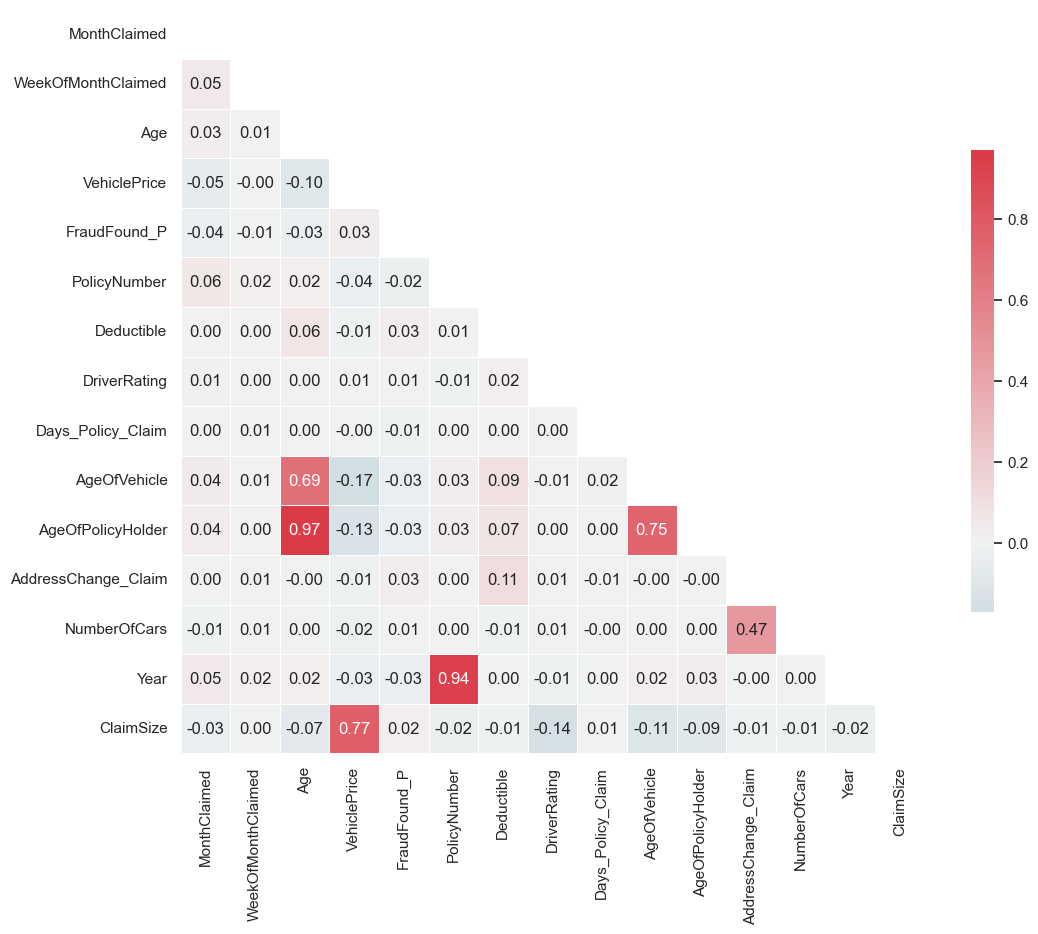

In [12]:
if not os.path.exists('Figures/Part 3'):
    os.makedirs('Figures/Part 3')
sns.set(style="white")
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,center=0,annot=True,mask=mask,fmt='.2f', cbar_kws={"shrink": .5},square=True, linewidths=.5)
fig.savefig("Figures/Part 3/heatmap.png")

### Remove Redundancy

Highly corrolated features :

- Year & PolicyNumber
- Age & AgeOfPolicyHolder

Between Age & AgeOfPolicyHolder I will keep Age because it also tells me about the AgeOfPlicyHolder
Year and PolicyNumber are corrolated because PolicyNumber is a sequental number assigned to the polycyholders during the time.
I will keep the Year becasue it tells me about the year the acciddent happend. Before removing the PolicyNumber lets see if we can find one policyholder who had several claims in the data or not.

In [13]:
len(data["PolicyNumber"].unique()) == data.shape[0]

True

if PolicyHolder doesn't tell us about the indivuals and their claim histories we can delete it.

In [14]:
data = data.drop(columns=["AgeOfPolicyHolder","PolicyNumber"])

## Nominal Data Encoding/ Engineering

### Remove Redundancy

Redundancy recognition and deletion in nominal data should be before the encoding. For finding the nominal data dependency I get  evey two possible pairs of the columns, then calculate the contengency table for them and use chi-squerd test to find out the data redundancy in nominal columns.

In [15]:
categorical_data = data.select_dtypes(include=['object'])
unique_pair_combinations = list(combinations(categorical_data.columns,2))
for col1 , col2 in unique_pair_combinations :
    table = pd.crosstab(data[col1],data[col2], margins = False)
    stat, p, dof, expected = chi2_contingency(table)
    # interpret test-statistic
    prob = 1
    # interpret p-value
    alpha = 1.0 - prob
    if p <= alpha:
        print(col1 + " and " + col2 + ' are dependent\n')

Make and PolicyType are dependent

PolicyType and VehicleCategory are dependent

PolicyType and PastNumberOfClaims are dependent

PolicyType and BasePolicy are dependent

VehicleCategory and BasePolicy are dependent

PastNumberOfClaims and BasePolicy are dependent



- PolicyType and Make
- PolicyType and PastNumberOfClaims and BasePolicy and VehicleCategory

After checking the contengency tables of the above collumns I found the following ones Highly dependent :

In [16]:
pd.crosstab(data["VehicleCategory"],data["PolicyType"], margins = False)

PolicyType,Sedan - All Perils,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
VehicleCategory,,,,,,,,,
Sedan,3063,4183,0,0,0,0,0,0,0
Sport,0,0,3737,19,262,1,0,0,0
Utility,0,0,0,0,0,0,251,24,13


In [17]:
pd.crosstab(data["BasePolicy"],data["PolicyType"], margins = False)

PolicyType,Sedan - All Perils,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
BasePolicy,,,,,,,,,
All Perils,3063,0,0,19,0,0,251,0,0
Collision,0,4183,0,0,262,0,0,24,0
Liability,0,0,3737,0,0,1,0,0,13


Having **PolicyType** we can determine **BasePolicy** and **VehicleCategory**. So we can remove these two columns.

In [18]:
data = data.drop(columns=["BasePolicy","VehicleCategory"])

### Nominal Data Encoding

In [19]:
#binary encoding for columns with more than 3 qunique values

encoder= ce.BinaryEncoder(cols=["Make","PolicyType","MaritalStatus",
                                "Days_Policy_Accident","PastNumberOfClaims","NumberOfSuppliments"],return_df=True)
data = encoder.fit_transform(data)

In [20]:
data.dtypes

Make_0                      int64
Make_1                      int64
Make_2                      int64
Make_3                      int64
Make_4                      int64
AccidentArea               object
MonthClaimed                int64
WeekOfMonthClaimed          int64
Sex                        object
MaritalStatus_0             int64
MaritalStatus_1             int64
MaritalStatus_2             int64
Age                       float64
Fault                      object
PolicyType_0                int64
PolicyType_1                int64
PolicyType_2                int64
PolicyType_3                int64
VehiclePrice                int64
FraudFound_P                int64
Deductible                  int64
DriverRating              float64
Days_Policy_Accident_0      int64
Days_Policy_Accident_1      int64
Days_Policy_Accident_2      int64
Days_Policy_Claim           int64
PastNumberOfClaims_0        int64
PastNumberOfClaims_1        int64
PastNumberOfClaims_2        int64
AgeOfVehicle  

In [24]:
# one-hot encoding for columns with up to 3 unique values

data = pd.get_dummies(data,drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11553 entries, 0 to 11552
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make_0                  11553 non-null  int64  
 1   Make_1                  11553 non-null  int64  
 2   Make_2                  11553 non-null  int64  
 3   Make_3                  11553 non-null  int64  
 4   Make_4                  11553 non-null  int64  
 5   MonthClaimed            11553 non-null  int64  
 6   WeekOfMonthClaimed      11553 non-null  int64  
 7   MaritalStatus_0         11553 non-null  int64  
 8   MaritalStatus_1         11553 non-null  int64  
 9   MaritalStatus_2         11553 non-null  int64  
 10  Age                     11553 non-null  float64
 11  PolicyType_0            11553 non-null  int64  
 12  PolicyType_1            11553 non-null  int64  
 13  PolicyType_2            11553 non-null  int64  
 14  PolicyType_3            11553 non-null